## Description
The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

# Importing all the libraries

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [170]:
train=pd.read_csv('human_activity_train.csv')
test=pd.read_csv('human_activity_test.csv')

In [171]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [172]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


# Data Pre-processing


### Checking for duplicates value

In [173]:
print('Number of duplicate: ',sum(train.duplicated()))
print('Number of duplicate: ',sum(test.duplicated()))

Number of duplicate:  0
Number of duplicate:  0


### Checking for missing values

In [174]:
print('Number of duplicate: ',train.isna().values.sum())
print('Number of duplicate: ',test.isna().values.sum())

Number of duplicate:  0
Number of duplicate:  0


### Checking for class imbalance

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

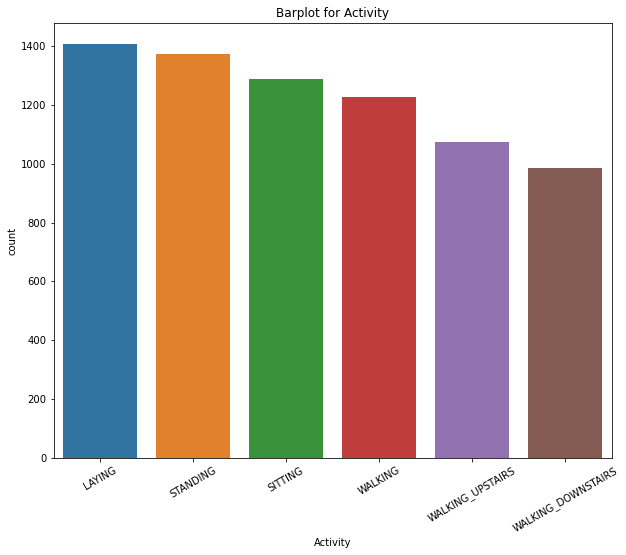

In [175]:
plt.figure(figsize = (10, 8))
plt.title("Barplot for Activity")
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation = 30)

# Data Analysis

### Feature's name

In [176]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [177]:
from collections import Counter

In [178]:
pd.DataFrame.from_dict(Counter(
    [col.split('-')[0].split('(')[0] for col in train.columns]), orient = "index")\
    .rename(columns = {0: "count"}).sort_values('count', ascending = False)


,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


### Analysing tBodyAccMag-mean feature

Text(0.1, 15, 'Dynamic Activities')

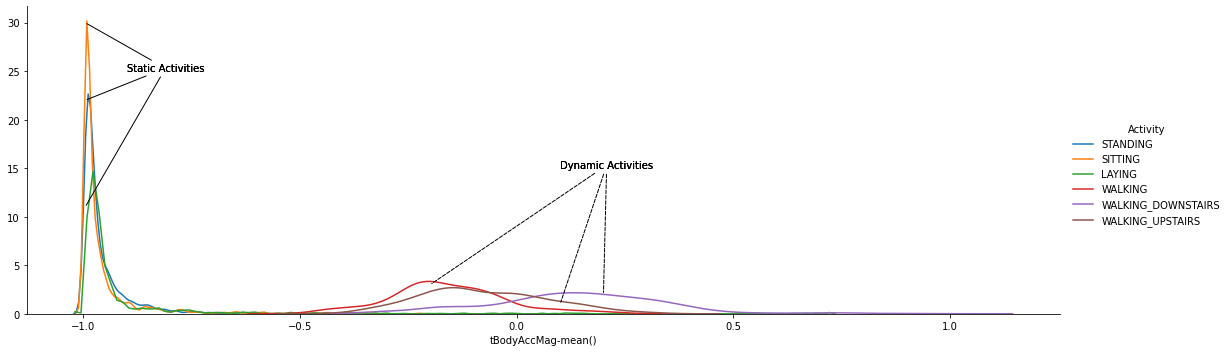

In [179]:
facetgrid = sns.FacetGrid(train, hue = "Activity",height = 5,aspect = 3)
facetgrid.map(sns.distplot, 'tBodyAccMag-mean()', hist = False).add_legend()

plt.annotate('Static Activities',xy=(-.996,30),xytext=(-0.9, 25),arrowprops={'arrowstyle':'-'})
plt.annotate('Static Activities',xy=(-.996,22),xytext=(-0.9, 25),arrowprops={'arrowstyle':'-'})
plt.annotate('Static Activities',xy=(-.996,11),xytext=(-0.9, 25),arrowprops={'arrowstyle':'-'})
plt.annotate('Dynamic Activities',xy=(-.2,3),xytext=(.1, 15),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(0.1,1),xytext=(.1, 15),arrowprops={'arrowstyle':'-','ls':'dashed'})
plt.annotate('Dynamic Activities',xy=(.2,2),xytext=(.1, 15),arrowprops={'arrowstyle':'-','ls':'dashed'})

### Digging deeper

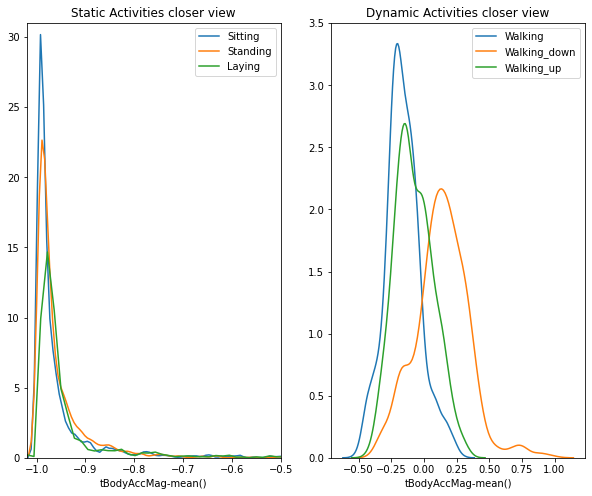

In [180]:
plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.title('Static Activities closer view')
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False, label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 31])


plt.subplot(1,2,2)
plt.title('Dynamic Activities closer view')
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'Walking')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Walking_down')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'Walking_up')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

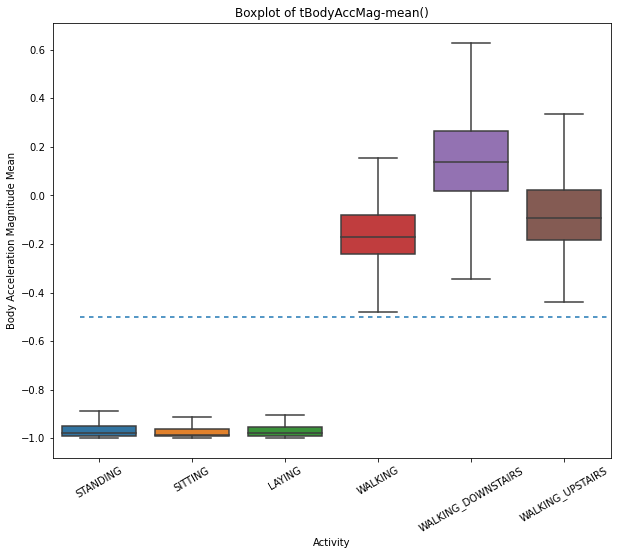

In [181]:
plt.figure(figsize = (10, 8))
sns.boxplot(x ="Activity", y = "tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel("Body Acceleration Magnitude Mean")
plt.title("Boxplot of tBodyAccMag-mean()")
plt.axhline(y=-0.5, xmin = 0.05, dashes = (3,3))
plt.xticks(rotation = 30)

###  Analysing the angle between x-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

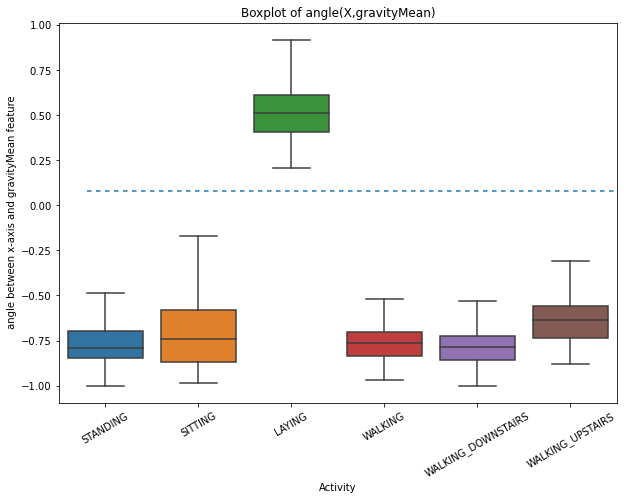

In [182]:
plt.figure(figsize = (10, 7))
sns.boxplot(x ="Activity", y = "angle(X,gravityMean)", data = train, showfliers = False)
plt.ylabel(" angle between x-axis and gravityMean feature")
plt.title("Boxplot of angle(X,gravityMean)")
plt.axhline(y=0.08, xmin = 0.05, dashes = (3,3))
plt.xticks(rotation = 30)

### Analysing the angle between y-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

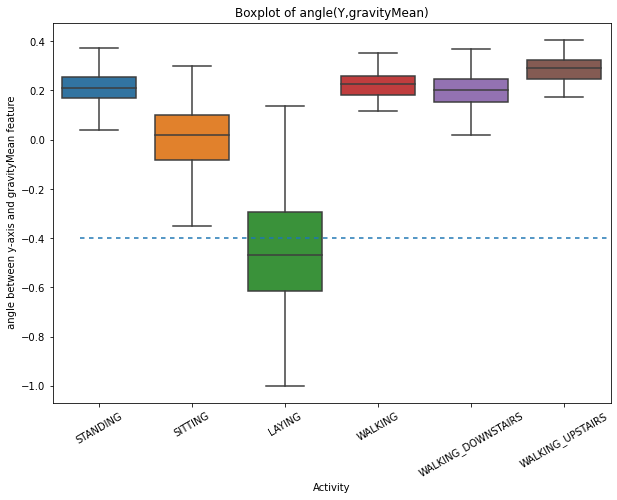

In [183]:
plt.figure(figsize = (10, 7))
sns.boxplot(x ="Activity", y = "angle(Y,gravityMean)", data = train, showfliers = False)
plt.ylabel(" angle between y-axis and gravityMean feature")
plt.title("Boxplot of angle(Y,gravityMean)")
plt.axhline(y=-0.4, xmin = 0.05, dashes = (3,3))
plt.xticks(rotation = 30)

### Visualising data using PCA

In [184]:
from sklearn.decomposition import PCA

In [185]:
x_for_pca = train.drop(['subject', 'Activity'], axis =1)
pca = PCA(n_components = 2, random_state = 42).fit_transform(x_for_pca)

In [186]:
pca

array([[-5.5202803 , -0.29027708],
       [-5.53534954, -0.08253013],
       [-5.47498801,  0.28738711],
       ...,
       [ 5.85750527, -3.08184327],
       [ 5.42109482, -3.42643005],
       [ 5.49797027, -2.78992864]])

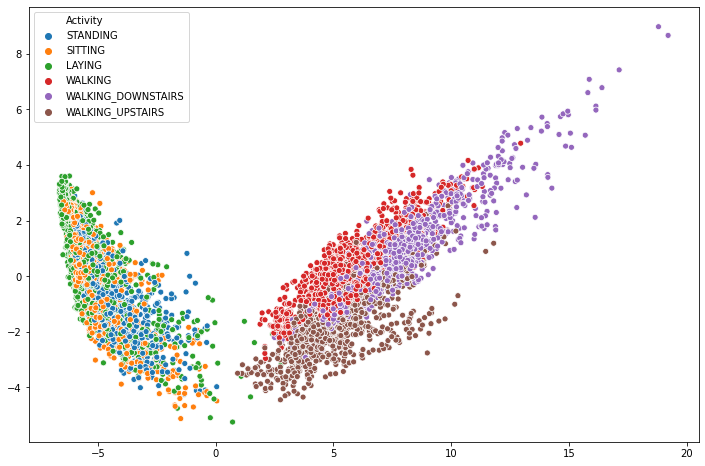

In [187]:
plt.figure(figsize = (12, 8))
sns.scatterplot(x = pca[:,0], y= pca[:, 1], hue = train["Activity"])

# ML Models

###  getting traing and test data ready

In [188]:
y_train = train.Activity
x_train = train.drop(['subject', 'Activity'], axis =1)
y_test = test.Activity
x_test = test.drop(['subject', 'Activity'], axis =1)

In [189]:
x_train.shape

(7352, 561)

In [190]:
x_test.shape

(2947, 561)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

### Logistic regression model with Hyperparameter tuning and cross validation

In [198]:
parameters = {'max_iter':[8000, 3000, 5000, 6000]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv = 3, random_state = 20)
lr_classifier_rs.fit(x_train, y_train)
y_prediction = lr_classifier_rs.predict(x_test)

In [199]:
def get_best_params(model):
    print("bes estimator : ", model.best_estimator_)
    print("best set of parameters : ", model.best_params_)

In [200]:
get_best_params(lr_classifier_rs)

bes estimator :  LogisticRegression(max_iter=8000)
best set of parameters :  {'max_iter': 8000}


In [201]:
lr_accuracy = accuracy_score(y_test, y_prediction)
print("Accurcay of logistic regression model : ", lr_accuracy)

Accurcay of logistic regression model :  0.9613165931455717


In [202]:
cm = confusion_matrix(y_test.values, y_prediction)

In [203]:
cm

array([[537,   0,   0,   0,   0,   0],
       [  0, 432,  56,   0,   0,   3],
       [  0,  11, 520,   1,   0,   0],
       [  0,   0,   0, 493,   3,   0],
       [  0,   0,   0,   3, 406,  11],
       [  0,   0,   0,  25,   1, 445]], dtype=int64)